In [14]:
import pandas as pd
import glob, os
import re
import numpy as np
dfT11=pd.read_csv("T1File.csv",parse_dates=[0,9],index_col=False)
dfT11['DATEt']=dfT11['DATEt'].dt.floor('T')
dfT11['Day']=dfT11.DATEt.dt.day

In [15]:
dfT11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727965 entries, 0 to 1727964
Data columns (total 15 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Date               datetime64[ns]
 1   Time               object        
 2   FAN-VLOTAGE(V)     float64       
 3   FAN-CURRENT(A)     float64       
 4   FAN-POWER-FACTOR   float64       
 5   FAN-POWER(Watts)   float64       
 6   LDR1-INTENSITY(%)  int64         
 7   LDR2-INTENSITY(%)  int64         
 8   HHid               int64         
 9   DATEt              datetime64[ns]
 10  Year               int64         
 11  Month              object        
 12  weekDay            object        
 13  Hour               int64         
 14  Day                int64         
dtypes: datetime64[ns](2), float64(4), int64(6), object(3)
memory usage: 197.8+ MB


In [16]:
T1HHpower_month_before=dfT11.groupby(['HHid','Month'],sort=False,as_index=False)['FAN-POWER(Watts)'].mean()
print("total power (Wh) fan is used")
print(T1HHpower_month_before)

total power (Wh) fan is used
    HHid Month  FAN-POWER(Watts)
0   6001   Oct         22.128042
1   6001   Nov          0.205562
2   6001   Dec          0.256446
3   6001   Jan          0.140200
4   6001   Feb          0.037135
5   6001   Mar         16.224149
6   6001   Apr         26.040010
7   6002   Oct         19.658257
8   6002   Nov          0.721955
9   6002   Dec          0.310710
10  6002   Jan          0.087899
11  6002   Feb          0.048445
12  6002   Mar         16.503222
13  6002   Apr         22.092737
14  6002   May         26.951755
15  6002   Jun         28.907217
16  6002   Jul         32.833240
17  6003   Nov          0.097090
18  6003   Dec          0.000000
19  6003   Jan          0.342906
20  6003   Feb          2.765064
21  6003   Mar         16.632922
22  6003   Apr         21.404123
23  6003   May         31.771764
24  6003   Jun         26.847164
25  6003   Jul         22.504161
26  6004   Oct          4.445927
27  6004   Nov          0.176269
28  6004   Dec

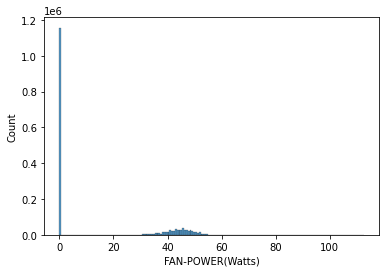

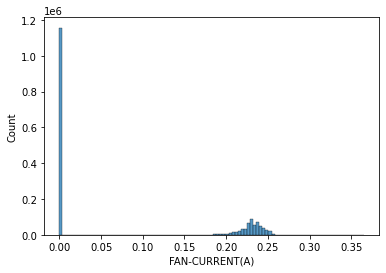

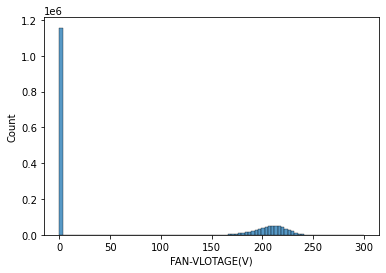

In [17]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
#df = sb.load_dataset('iris')
sb.histplot(dfT11['FAN-POWER(Watts)'])
plt.show()
sb.histplot(dfT11['FAN-CURRENT(A)'])
plt.show()
sb.histplot(dfT11['FAN-VLOTAGE(V)'])
plt.show()

In [18]:
#function to remove phantom load...power is less than 10 W is removed
def fun_removeFantom(df):
    print("original length",len(df))
    import pandas as pd
    DFpower=df[df['FAN-POWER(Watts)']>=10.0]
    #DFpower=df[df['FAN-VLOTAGE(V)']>=150.0]
    print("removing power <10W",len(DFpower))
    #print(DFpower.head())
    return DFpower

In [19]:
file6001=dfT11.loc[dfT11['HHid']==6001]
DF6001=fun_removeFantom(file6001)
#DF6001.to_csv("Power6001.csv")

file6002=dfT11.loc[dfT11['HHid']==6002]
DF6002=fun_removeFantom(file6002)
#DF6002All.to_csv("Energy6002.csv")

file6003=dfT11.loc[dfT11['HHid']==6003]
DF6003=fun_removeFantom(file6003)
#DF6003All.to_csv("Energy6003.csv")

file6004=dfT11.loc[dfT11['HHid']==6004]
DF6004=fun_removeFantom(file6004)
#DF6004All.to_csv("Energy6004.csv")

file6005=dfT11.loc[dfT11['HHid']==6005]
DF6005=fun_removeFantom(file6005)
#DF6005All.to_csv("Energy6005.csv")

file6006=dfT11.loc[dfT11['HHid']==6006]
DF6006=fun_removeFantom(file6006)
#DF6006All.to_csv("Energy6006.csv")

original length 209086
removing power <10W 22579
original length 339184
removing power <10W 111820
original length 312573
removing power <10W 96101
original length 279184
removing power <10W 109908
original length 352434
removing power <10W 96559
original length 235504
removing power <10W 134021


In [20]:
frames=[DF6001, DF6002, DF6003, DF6004, DF6005, DF6006]
T1mergedDF=pd.concat(frames)
T1mergedDF.to_csv("FanPower_T1.csv")
T1mergedDF.head(10)

,Date,Time,FAN-VLOTAGE(V),FAN-CURRENT(A),FAN-POWER-FACTOR,FAN-POWER(Watts),LDR1-INTENSITY(%),LDR2-INTENSITY(%),HHid,DATEt,Year,Month,weekDay,Hour,Day
0,2020-10-07,16:28:17,236.9,0.244,0.923,53.4,9,97,6001,2020-10-07 16:28:00,2020,Oct,Wednesday,16,7
1,2020-10-07,16:29:17,235.0,0.245,0.917,52.8,7,97,6001,2020-10-07 16:29:00,2020,Oct,Wednesday,16,7
2,2020-10-07,16:30:17,238.9,0.249,0.919,54.7,6,97,6001,2020-10-07 16:30:00,2020,Oct,Wednesday,16,7
3,2020-10-07,16:31:17,235.0,0.248,0.924,53.9,4,97,6001,2020-10-07 16:31:00,2020,Oct,Wednesday,16,7
4,2020-10-07,16:32:17,234.3,0.247,0.915,53.0,3,95,6001,2020-10-07 16:32:00,2020,Oct,Wednesday,16,7
5,2020-10-07,16:33:17,234.6,0.250,0.919,53.9,2,97,6001,2020-10-07 16:33:00,2020,Oct,Wednesday,16,7
6,2020-10-07,16:34:18,233.1,0.248,0.923,53.4,2,97,6001,2020-10-07 16:34:00,2020,Oct,Wednesday,16,7
7,2020-10-07,16:35:18,232.1,0.245,0.914,52.0,0,97,6001,2020-10-07 16:35:00,2020,Oct,Wednesday,16,7
8,2020-10-07,16:36:18,232.2,0.245,0.917,52.2,0,97,6001,2020-10-07 16:36:00,2020,Oct,Wednesday,16,7
9,2020-10-07,16:37:18,225.2,0.243,0.919,50.3,0,97,6001,2020-10-07 16:37:00,2020,Oct,Wednesday,16,7


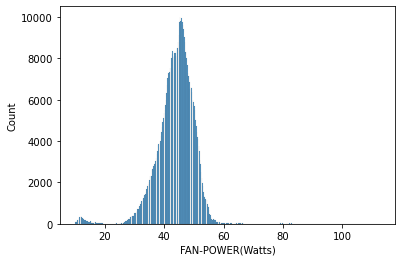

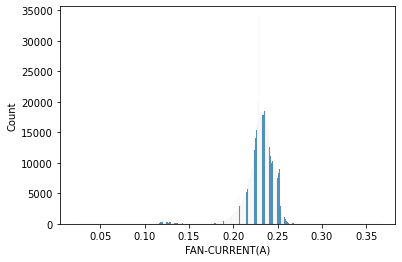

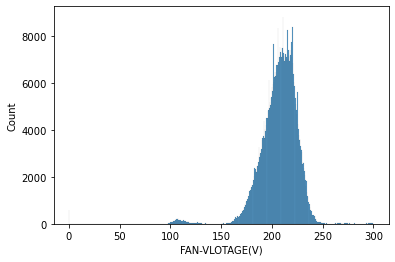

In [21]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
#df = sb.load_dataset('iris')
sb.histplot(T1mergedDF['FAN-POWER(Watts)'])
plt.show()
sb.histplot(T1mergedDF['FAN-CURRENT(A)'])
plt.show()
sb.histplot(T1mergedDF['FAN-VLOTAGE(V)'])
plt.show()

In [22]:
T1HHTime_month=T1mergedDF.groupby(['HHid','Month'],sort=False, as_index=False)['FAN-POWER(Watts)'].count()
print("number of minutes of fan usage")
print(T1HHTime_month)
T1HHTime_monthDays=T1mergedDF.groupby(['HHid','Month'],sort=False, as_index=False)['Date'].nunique()
print("number of days fan is used in month")
print(T1HHTime_monthDays)
T1HHpower_month=T1mergedDF.groupby(['HHid','Month'],sort=False,as_index=False)['FAN-POWER(Watts)'].sum()
print("total power (Wh) fan is used")
print(T1HHpower_month)

df_print=pd.concat([T1HHTime_month,T1HHTime_monthDays],axis=1)
df_print=df_print.rename(columns={'Month':'month','FAN-POWER(Watts)':'usage'})

df_print=df_print.assign(avgUsagehrs=lambda x: (x['usage']/(x['Date']*60)))
#df_print = df_print.reset_index(drop=True)
#print(df_print)

# df_print_1=pd.concat([df_print,T1HHEnergy_month],axis=1).drop_duplicates()
# print(df_print_1)
# df_print_1.to_csv("energyUsageT1.csv")

number of minutes of fan usage
    HHid Month  FAN-POWER(Watts)
0   6001   Oct             15343
1   6001   Nov               170
2   6001   Dec               210
3   6001   Jan               132
4   6001   Feb                34
5   6001   Mar              5741
6   6001   Apr               949
7   6002   Oct             13948
8   6002   Nov               536
9   6002   Dec               246
10  6002   Jan                72
11  6002   Feb                35
12  6002   Mar              6225
13  6002   Apr             18724
14  6002   May             23336
15  6002   Jun             22767
16  6002   Jul             25931
17  6003   Nov                51
18  6003   Jan               240
19  6003   Feb              2070
20  6003   Mar             13082
21  6003   Apr             17349
22  6003   May             24668
23  6003   Jun             20094
24  6003   Jul             18547
25  6004   Oct               914
26  6004   Nov               128
27  6004   Dec                 8
28  6004   J

In [23]:
T1HHpower_month=T1mergedDF.groupby(['HHid','Month'],sort=False,as_index=False)['FAN-POWER(Watts)'].mean()
print(" monthly average power (Wh) fan usage")
print(T1HHpower_month)

 monthly average power (Wh) fan usage
    HHid Month  FAN-POWER(Watts)
0   6001   Oct         44.935371
1   6001   Nov         48.022941
2   6001   Dec         50.773810
3   6001   Jan         42.702273
4   6001   Feb         39.414706
5   6001   Mar         51.993015
6   6001   Apr         52.875764
7   6002   Oct         40.693038
8   6002   Nov         47.723134
9   6002   Dec         47.681301
10  6002   Jan         43.050000
11  6002   Feb         46.151429
12  6002   Mar         48.796321
13  6002   Apr         45.961050
14  6002   May         46.692467
15  6002   Jun         46.044253
16  6002   Jul         43.629208
17  6003   Nov         46.966667
18  6003   Jan         49.594167
19  6003   Feb         45.018454
20  6003   Mar         48.784987
21  6003   Apr         45.663906
22  6003   May         47.129577
23  6003   Jun         45.407803
24  6003   Jul         42.221238
25  6004   Oct         54.154158
26  6004   Nov         49.776563
27  6004   Dec         46.637500
28  6

In [24]:
T1power_month=T1mergedDF.groupby(['Month'],sort=False,as_index=False)['FAN-POWER(Watts)'].mean()
print("monthly avaerage fan power (Wh) ")
print(T1power_month)

monthly avaerage fan power (Wh) 
  Month  FAN-POWER(Watts)
0   Oct         43.256240
1   Nov         45.145084
2   Dec         47.759136
3   Jan         45.378348
4   Feb         48.250187
5   Mar         47.503699
6   Apr         43.772927
7   May         45.238950
8   Jun         43.674893
9   Jul         39.891195


In [25]:
T1HHTime_month=T1mergedDF.groupby(['HHid','Month'],sort=False, as_index=False)['FAN-POWER(Watts)'].count()
print("number of minutes of fan usage")
#print(T4HHTime_month)
T1HHTime_monthDays=T1mergedDF.groupby(['HHid','Month'],sort=False, as_index=False)['Date'].nunique()
df_print=pd.merge(T1HHTime_month,T1HHTime_monthDays ,how="inner")
df_print=df_print.rename(columns={'Date':'Days','FAN-POWER(Watts)':'usageMins'})

df_print=df_print.assign(avgUsagehrs=lambda x: (x['usageMins']/(x['Days']*60)))
#df_print = df_print.reset_index(drop=True)
print(df_print)
#df_print.to_csv("T1usage.csv", index=False)
print("monthly avaerage hours of fan usage ")
print(df_print.groupby(['Month'],sort=False)['avgUsagehrs'].mean())

number of minutes of fan usage
    HHid Month  usageMins  Days  avgUsagehrs
0   6001   Oct      15343    21    12.176984
1   6001   Nov        170     7     0.404762
2   6001   Dec        210     5     0.700000
3   6001   Jan        132     6     0.366667
4   6001   Feb         34     2     0.283333
5   6001   Mar       5741    14     6.834524
6   6001   Apr        949     2     7.908333
7   6002   Oct      13948    23    10.107246
8   6002   Nov        536    19     0.470175
9   6002   Dec        246    14     0.292857
10  6002   Jan         72     6     0.200000
11  6002   Feb         35     5     0.116667
12  6002   Mar       6225    16     6.484375
13  6002   Apr      18724    30    10.402222
14  6002   May      23336    30    12.964444
15  6002   Jun      22767    30    12.648333
16  6002   Jul      25931    30    14.406111
17  6003   Nov         51     1     0.850000
18  6003   Jan        240     4     1.000000
19  6003   Feb       2070     8     4.312500
20  6003   Mar      1308

In [30]:
print(df_print['avgUsagehrs'].mean())

6.74644414041096


In [27]:
T1HHTime_monthDay=T1mergedDF.groupby(['HHid','Month','Day'],sort=False, as_index=False)['FAN-POWER(Watts)'].count()
print(" fan usage hours: daily average")
T1HHTime_monthDay=T1HHTime_monthDay.rename(columns={'FAN-POWER(Watts)':'usageMins'})
T1HHTime_monthDay=T1HHTime_monthDay.assign(avgUsagehrs=lambda x: (x['usageMins']/(60)))
print(T1HHTime_monthDay)
T1HHTime_monthDay.to_csv("T1UsageDay.csv", index=False)

number of minutes of fan usage: daily average
     HHid Month  Day  usageMins  avgUsagehrs
0    6001   Oct    7        315     5.250000
1    6001   Oct    8        897    14.950000
2    6001   Oct    9        944    15.733333
3    6001   Oct   10        829    13.816667
4    6001   Oct   11        838    13.966667
..    ...   ...  ...        ...          ...
948  6006   Jul   27        451     7.516667
949  6006   Jul   28        751    12.516667
950  6006   Jul   29        905    15.083333
951  6006   Jul   30       1034    17.233333
952  6006   Jul   31        136     2.266667

[953 rows x 5 columns]


In [28]:
print(T1HHTime_monthDay['avgUsagehrs'].mean())

9.985799230500175
